In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import os 

In [4]:
plt.rcParams['figure.figsize']=(15,7)

In [5]:
COUNTRY = 'DE'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')

In [7]:
load_series = df['load']
print(f"Loaded data for {COUNTRY}. Date range: {load_series.index.min()} to {load_series.index.max()}")
print(load_series.head())

Loaded data for DE. Date range: 2015-01-01 00:00:00+00:00 to 2017-04-12 03:00:00+00:00
timestamp
2015-01-01 00:00:00+00:00    41151.0
2015-01-01 01:00:00+00:00    40135.0
2015-01-01 02:00:00+00:00    39106.0
2015-01-01 03:00:00+00:00    38765.0
2015-01-01 04:00:00+00:00    38941.0
Name: load, dtype: float64


In [10]:
stl = sm.tsa.STL(load_series, period=24)
res = stl.fit()

In [11]:
output_dir = os.path.join('..', 'outputs', 'Trend')
os.makedirs(output_dir, exist_ok=True)

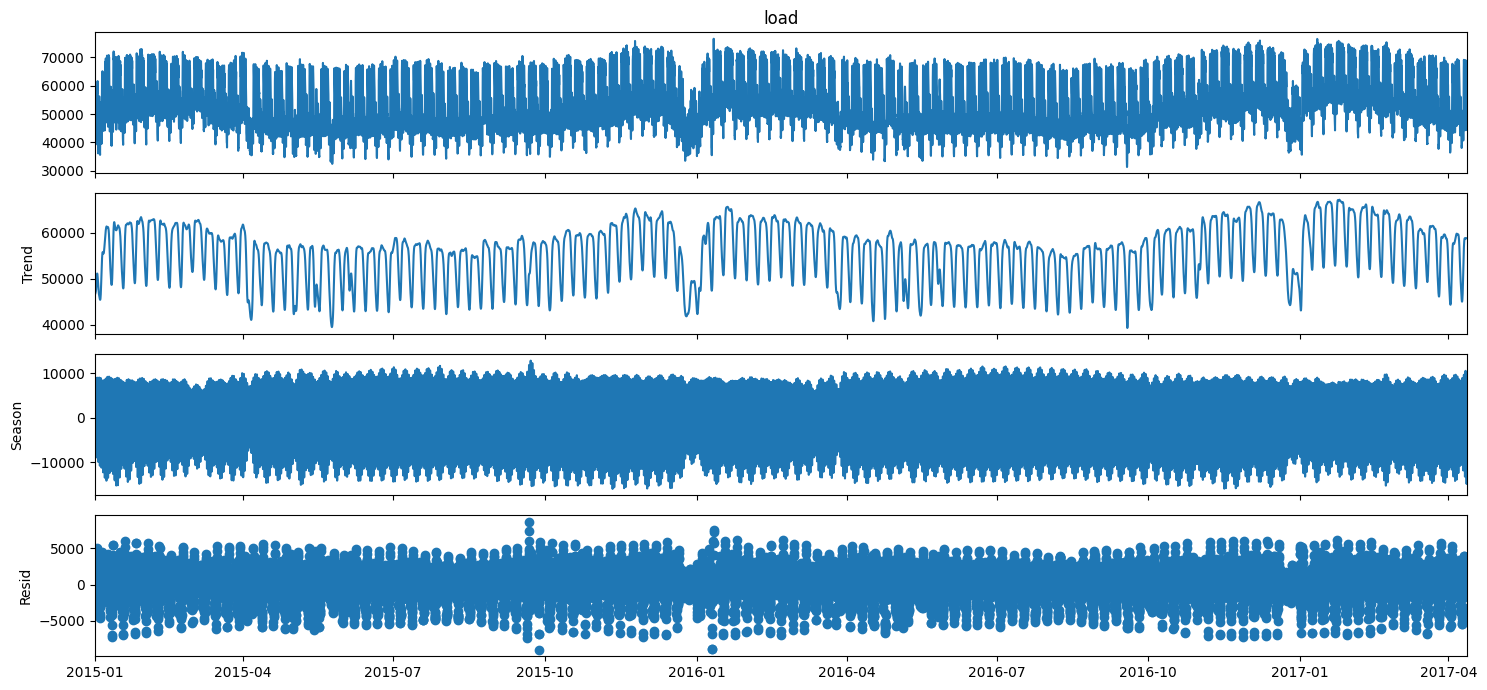

In [12]:
fig = res.plot()

In [14]:
plot_path = os.path.join(output_dir, f'{COUNTRY}_stl_plot.png')
fig.savefig(plot_path)
print(f"Saved STL plot to {plot_path}")

Saved STL plot to ../outputs/Trend/DE_stl_plot.png


In [15]:
def run_adf_test(series, name):
    print(f"ADF Test for : {name}")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is non-stationary")


Testing originaal non stationary data

In [ ]:

run_adf_test(load_series, 'Original Series')

ADF Test for : Original Series
ADF Statistic: -17.51213358076925
p-value: 4.329394799737566e-30
The data is stationary


1st order differencing d=1

In [17]:
load_diff1 = load_series.diff(1)
run_adf_test(load_diff1, '1st Order Differencing')

ADF Test for : 1st Order Differencing
ADF Statistic: -23.87929864333373
p-value: 0.0
The data is stationary


1st order Seasonal Differencing (D=1, s=24)

In [18]:
load_seasonal_diff_24 = load_series.diff(24)
run_adf_test(load_seasonal_diff_24, '1st order Seasonal Differencing')

ADF Test for : 1st order Seasonal Differencing
ADF Statistic: -25.263230463452473
p-value: 0.0
The data is stationary
